---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

**Subgrupo: P5-3**

- Estudiante: **Jafet David Gutiérrez Guevara**
- Carné: **B73558**


- Estudiante: **Jorge Adan Mora Soto**
- Carné: **B95222**


- Estudiante: Leonela Zúñiga Jiménez
- Carné: **B59077**


# `Proyecto 5` - *Procesos M/M/s*

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 7$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

### Parte 1 (40%)

>#### Hacer la determinación teórica del número  𝑠  de servidores necesarios para cumplir el requisito.

$ \lambda = 7 $ personas por minuto
    
$ v = 0.25 $ personas por minuto

Se parte de la siguiente expresión que establece la probabilidad de que se cumpla la condición de ruptura (que se excedan las 100 personas en fila):

$$
    P(101 \; o \; mas \; personas) = \sum_{i=101}^{\infty} (1 - \rho)\rho^{i}
$$

$$
   \Longrightarrow  P(101 \; o \; mas \; personas) = 1 - \sum_{i=0}^{100} (1 - \rho)\rho^{i}
$$

$$
   \Longrightarrow  P(101 \; o \; mas \; personas) = \rho^{101} \;\;\;\;\;\;\;\;\;\;\;\;\; (1)
   \label{eq1}
$$

Tomando en cuenta que:

$$
    \rho = \frac{\lambda}{sv}
$$

y sustituyéndolo en la ecuación 1 se tiene que:

$$
    P(101 \; o \; mas \; personas) = \left(\frac{\lambda}{sv}\right)^{101}
$$

El sistema no debe exceder más de 100 personas en fila durante el $95\%$ del tiempo de servicio. Por lo tanto:

$$
    P(101 \; o \; mas \; personas) = \left(\frac{\lambda}{sv}\right)^{101} \leq 0.05
$$

que corresponde al $5\%$ de la probabilidad que ocurra la condición de ruptura.

Despejando $s$ de la expresión anterior:

$$
    \Longrightarrow s^{101} \geq \frac{\lambda^{101}}{0.05v^{101}}
$$

$$
    \Longrightarrow s \geq \frac{\lambda}{v} \; \sqrt[101]{\frac{1}{0.05}}
$$

$$
    \Longrightarrow s \geq \frac{7}{0.25} \; \sqrt[101]{\frac{1}{0.05}}
$$

$$
    \Longrightarrow s \geq 28.84
$$

Por lo tanto, se deben tener por lo menos 29 servidores para que el sistema no exceda más de 100 personas en fila durante el $95\%$ del tiempo de servicio.

### Parte 2 (60%)

>#### Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

En esta sección se implementó el código provisto en una función que realiza la simulación a partir de los siguientes parámetros de entrada: número de clientes (N), parámetro de llegada (lam), parámetro de servicio (nu) y número de servidores (s). El código de dicha función se muestra a continuación:

In [38]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def simulacion(N, lam, nu, s):

    ''' Parámetros de la función simulacion:
    - N: Número de clientes
    - lam: Parámetro de llegada (clientes/segundos)
    - nu: Parámetro de servicio (servicios/segundos)
    - s: Número de servidores '''

    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale = 1/lam)

    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale = 1/(s*nu))

    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0]          # primera llegada
    fin = inicio + t_servicio[0]    # primera salida

    # Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Umbral de P o más personas en sistema (hay P - 1 en fila)
    P = 101

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P: 
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)

    # Resultados
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu =', str(nu*60))
    print('Cantidad de servidores =', str(s))
    print('Tiempo con más de {} solicitudes en fila:'.format(P-1))
    print('\t {:0.2f}%'.format(100*fraccion))
    
    if fraccion <= 0.05:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.xlim((0, 15000))
    plt.show()

A continuación se muestran tres simulaciones hechas con distintas cantidades de servidores, de manera que se demuestra el comportamiento del sistema cuando la cantidad de servidores es igual, menor y mayor a 29.

Parámetro lambda = 7.0
Parámetro nu = 0.25
Cantidad de servidores = 29
Tiempo con más de 100 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.00 horas.


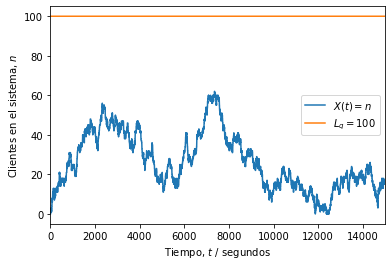

In [51]:
# Simulación con s=29
simulacion(3150, (7/60), (0.25/60), 29)

Parámetro lambda = 7.0
Parámetro nu = 0.25
Cantidad de servidores = 28
Tiempo con más de 100 solicitudes en fila:
	 61.82%
	 No cumple con la especificación.
Simulación es equivalente a 8.03 horas.


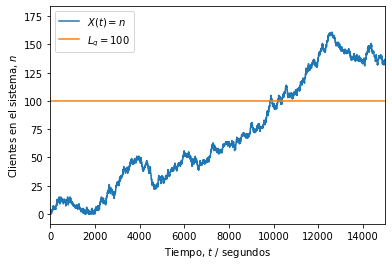

In [67]:
# Simulación con s=28
simulacion(3150, (7/60), (0.25/60), 28)

Parámetro lambda = 7.0
Parámetro nu = 0.25
Cantidad de servidores = 35
Tiempo con más de 100 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 7.91 horas.


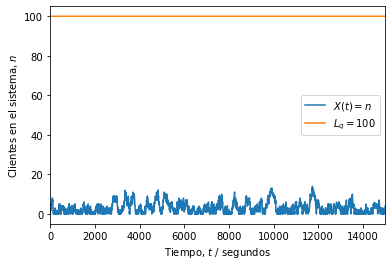

In [69]:
# Simulación con s=35
simulacion(3150, (7/60), (0.25/60), 35)

### Análisis de resultados

- Con una tasa de llegada de 7 personas por minuto y una tasa de servicio por cada servidor de 0.25 personas por minuto, se necesitan 29 o más servidores para lograr que el sistema no exceda las 100 personas en fila durante el 95% del tiempo de servicio.
---
- En la primera y tercera simulación se cumplieron con éxito los requerimientos, debido a que la cantidad de servidores en ambos casos fue igual o mayor a 29. En las dos simulaciones el sistema no excedió las 100 personas en fila durante el 100% del tiempo del servicio. 
---
- La primera simulación se realizó con 29 servidores, lo cual dio como resultado un máximo aproximado de 65 clientes en el sistema. Sin embargo en la tercera simulación al utilizar 35 servidores, una cantidad mayor a la anterior, se obtuvo un pico mucho menor: casi de 20 clientes en el sistema. Este resultado tiene sentido tomando en cuenta que al tener mayor cantidad de servidores se atienden más clientes y por lo tanto la cola disminuye. 
---
- La segunda simulación demuestra lo que pasaría si se tuviera solo un servidor menos que el mínimo necesario, es decir, si el sistema tan solo contara con 28 servidores. En los resultados de esta prueba se puede observar que no se cumplieron con los requerimientos, como era de esperarse, ya que un 61.82% del tiempo del servicio se excedieron los 100 clientes en fila.

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---